# Machine Learning 
#### Leaving out draws from our target category

# Outline
## 1. Data Prep
### 1.1 Import CSV
### 1.2 Remove all draws
### 1.3 Basic EDA
### 1.4 Convert target from an integer
### 1.5 Split and scale the data

## 2. Models

### 2.1 Decision Tree
### 2.2 Decision Tree with pruning
### 2.3 Random Forest
### 2.4 KNN
### 2.5  Neural Network

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 

# plotting
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

## 1. Data Prep

### 1.1 Import CSV

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.head()

,team,gameWeek,win,grid6Simple pass,grid6Touch,grid6Ground loose ball duel,grid6Ground attacking duel,grid6Ground defending duel,grid6Air duel,grid6Smart pass,...,grid3Smart pass,grid3Shot,grid3Acceleration,grid3Head pass,grid3Cross,grid3High pass,grid3Clearance,grid3Free Kick,grid3Corner,grid3Free kick cross
0,Real Sociedad,38,0,27,3,1,5,12,0,0,...,0,0,0,0,0,1,4,0,0,0
1,Real Sociedad,37,2,77,7,1,0,5,8,0,...,0,0,0,0,0,2,0,0,0,0
2,Real Sociedad,36,0,44,9,2,2,5,4,0,...,0,0,0,1,0,2,0,2,0,0
3,Real Sociedad,34,0,69,9,2,1,3,4,0,...,0,0,0,0,0,4,0,0,0,0
4,Real Sociedad,33,2,30,7,0,2,1,1,0,...,0,0,0,1,0,3,3,0,0,0


### 1.2 Remove all draws

For wins we have categories for "wins", "losses", and "draws". After a lot of experimentation I believe that it is best to remove the ties from the assessment for now. This is primarily due to the ambiguity around what might define a tie. When having the ties in the data our best model did fairly well at predicting wins and losses but terribly when it came to ties. I want to simplify things and test this out again.

In [4]:
games.drop(games[games['win'] == 1].index, inplace = True) 

In [5]:
games.loc[(games['win'] == 2), 'win'] = 1

### 1.3 Basic EDA

array([[<AxesSubplot:title={'center':'win'}>]], dtype=object)

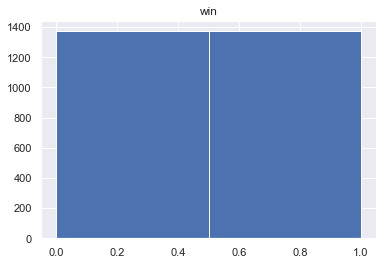

In [6]:
games.hist('win', bins=2)

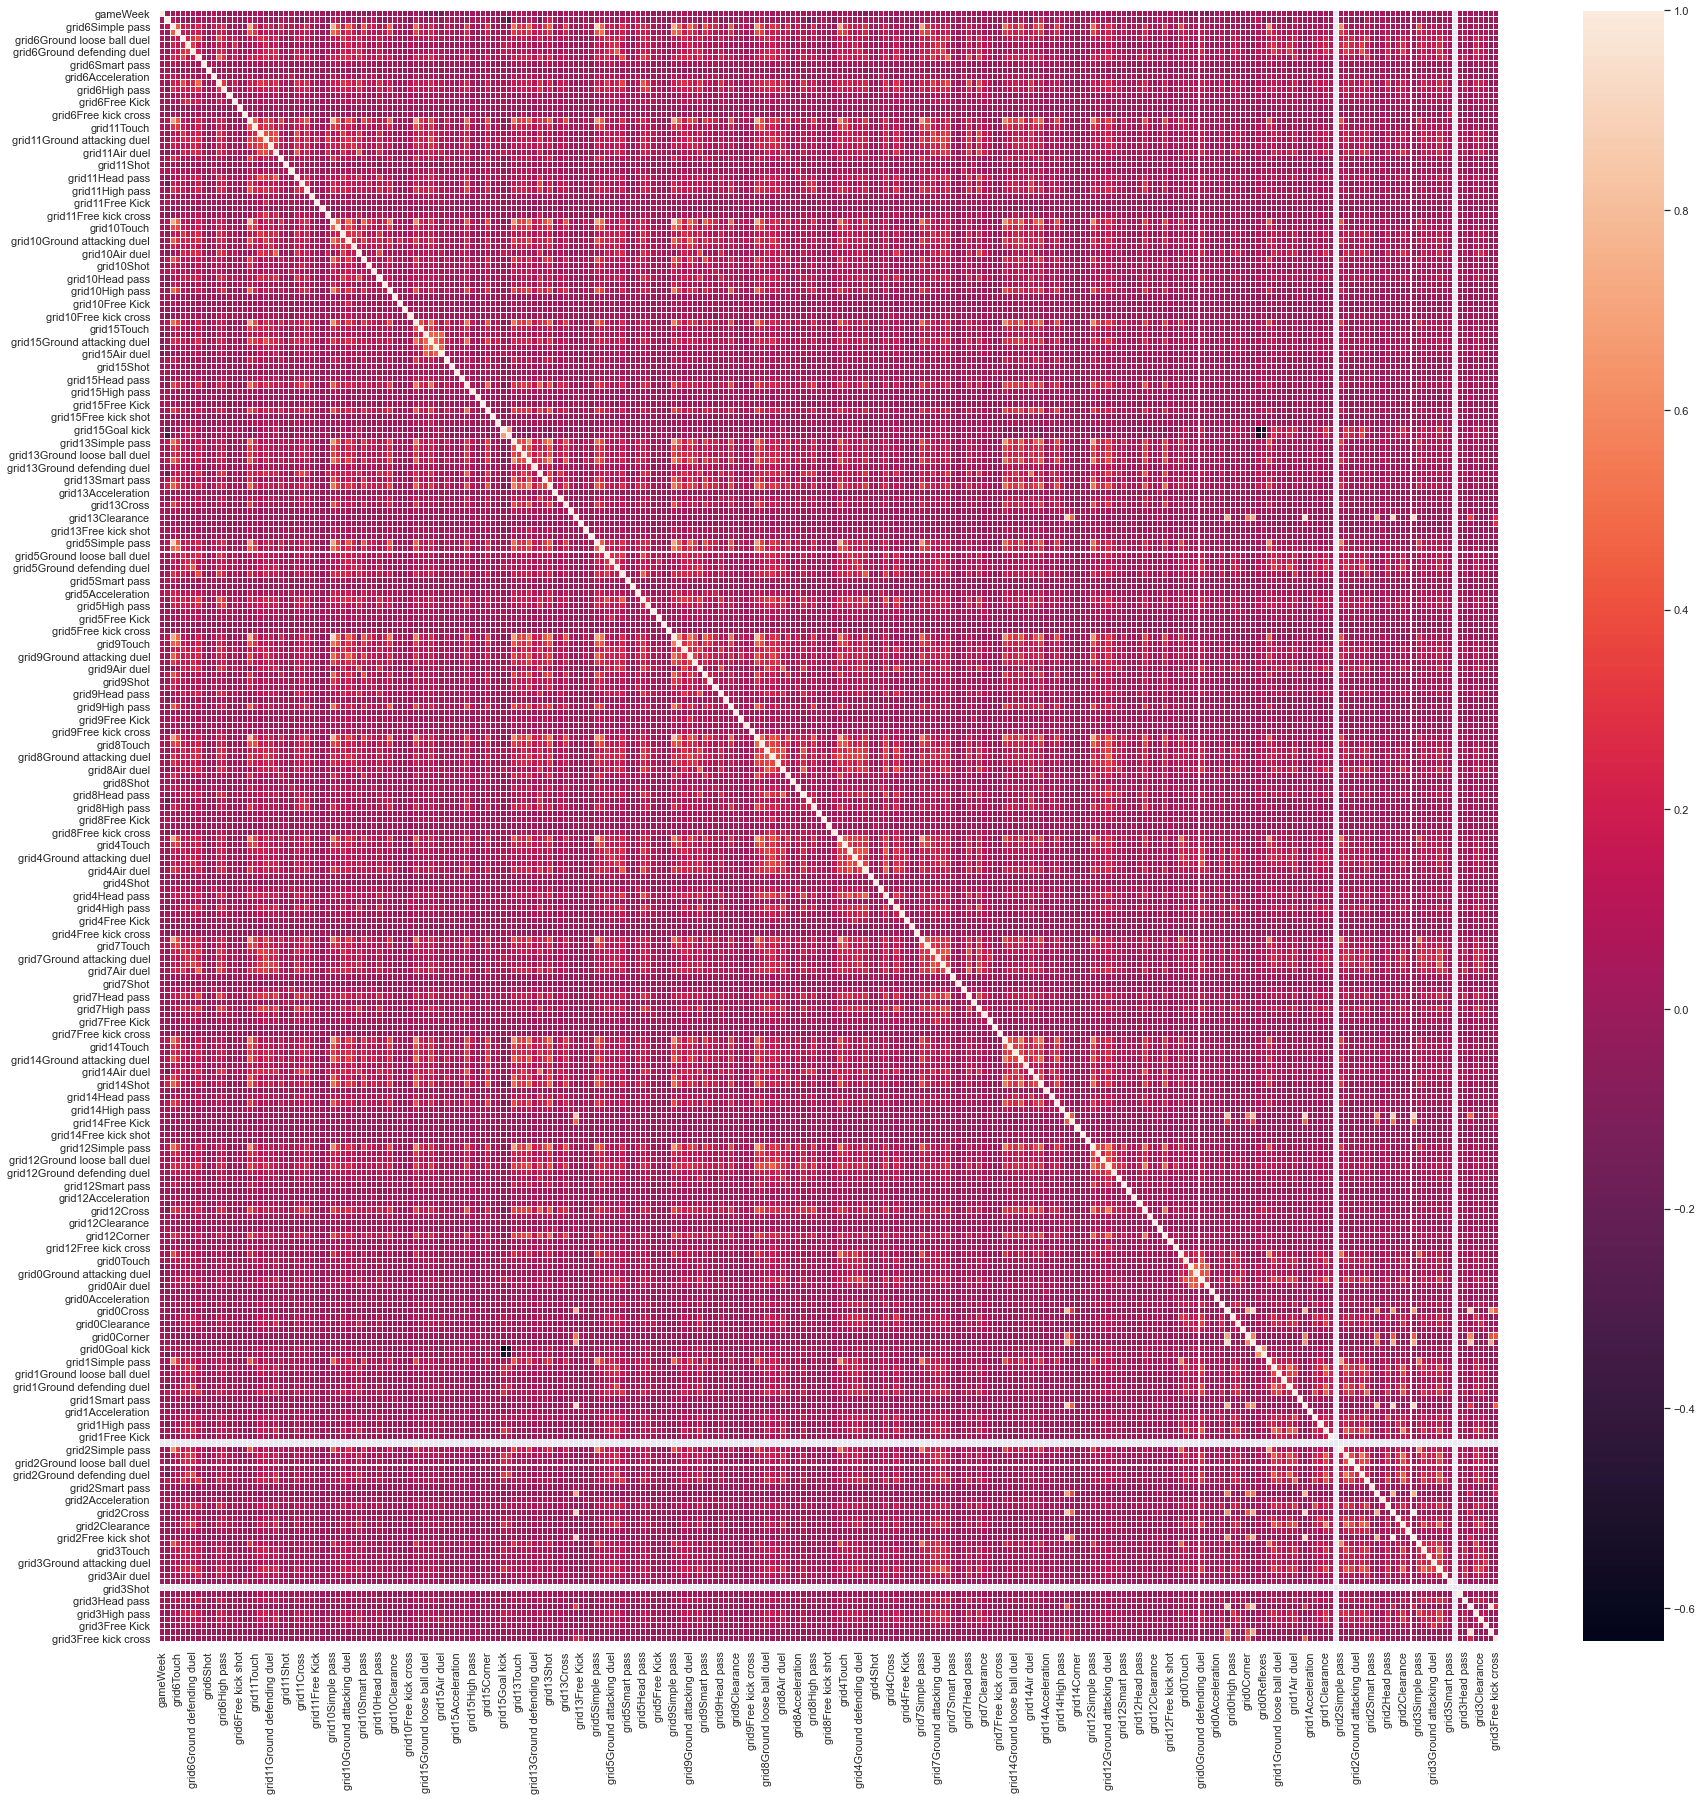

In [7]:
f, ax = plt.subplots(figsize=(30, 30))
_ = sns.heatmap(games.corr(), linewidths=.01, ax=ax)

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2744 entries, 0 to 3649
Columns: 260 entries, team to grid3Free kick cross
dtypes: int64(259), object(1)
memory usage: 5.5+ MB


### 1.4 Convert target from an integer

In [9]:
games['win'] = games['win'].astype(str)

In [10]:
games_test = games[games.gameWeek > 24]
games_train = games[games.gameWeek <=24]

In [11]:
games_train.drop(['gameWeek','team'], axis=1, inplace=True)
games_test.drop(['gameWeek','team'], axis=1, inplace=True)

### 1.5 Split and scale the data

In [12]:
#gather up names of all the columns
cols = games_train.columns

#set the prediction column and the feature columns for KNN
prediction_col = 'win'
feature_cols = [c for c in cols if c != prediction_col]

x_train = games_train[feature_cols].values
y_train = games_train[prediction_col].values

x_test = games_test[feature_cols].values
y_test = games_test[prediction_col].values

In [13]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## 2. Models

### 2.1 Decision Tree 

In [14]:
# establish and fit the model using DecisonTree()
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
predictions = tree_model.predict(x_test)

Examine importance features.

In [15]:
# display the importance features

importance_list = list(zip(feature_cols,tree_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
max_feature_len = len(max(feature_cols, key=len))

for feature, rank in sorted_import_feature:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank:.2f}')

grid15Reflexes: .............. 0.16
grid0Reflexes: ............... 0.13
grid13Air duel: .............. 0.03
grid13Shot: .................. 0.03
grid2Air duel: ............... 0.03
grid4Ground loose ball duel: . 0.02
grid14Air duel: .............. 0.02
grid9Smart pass: ............. 0.02
grid14Shot: .................. 0.02
grid5Simple pass: ............ 0.02
grid6Simple pass: ............ 0.02
grid13Head pass: ............. 0.02
grid6Ground loose ball duel: . 0.01
grid7Ground loose ball duel: . 0.01
grid15Cross: ................. 0.01
grid1Touch: .................. 0.01
grid1Ground loose ball duel: . 0.01
grid4Ground attacking duel: .. 0.01
grid8Acceleration: ........... 0.01
grid14Ground attacking duel: . 0.01
grid7Ground defending duel: .. 0.01
grid1Air duel: ............... 0.01
grid4Touch: .................. 0.01
grid9Ground attacking duel: .. 0.01
grid7Simple pass: ............ 0.01
grid8Cross: .................. 0.01
grid2Ground attacking duel: .. 0.01
grid2Touch: ................

In [16]:
# establish and fit the model using DecisonTree()
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
predictions = tree_model.predict(x_test)

####  Assess results

0    484
1    484
dtype: int64


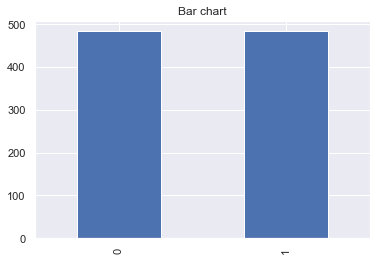

In [17]:
test_by_count=pd.value_counts(y_test, sort= False)
test_by_count.plot(kind= 'bar')
plt.title('Bar chart')

print(test_by_count)

0    495
1    473
dtype: int64


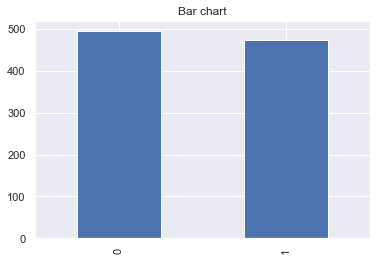

In [18]:
preds_by_count=pd.value_counts(predictions, sort= False)
preds_by_count.plot(kind= 'bar')
plt.title('Bar chart')

print(preds_by_count)

In [19]:
con_mat = confusion_matrix(y_test, predictions)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, predictions) )

[[341 143]
 [154 330]]
Accuracy Score : 0.6931818181818182


Text(0, -0.05, 'Decision Tree')

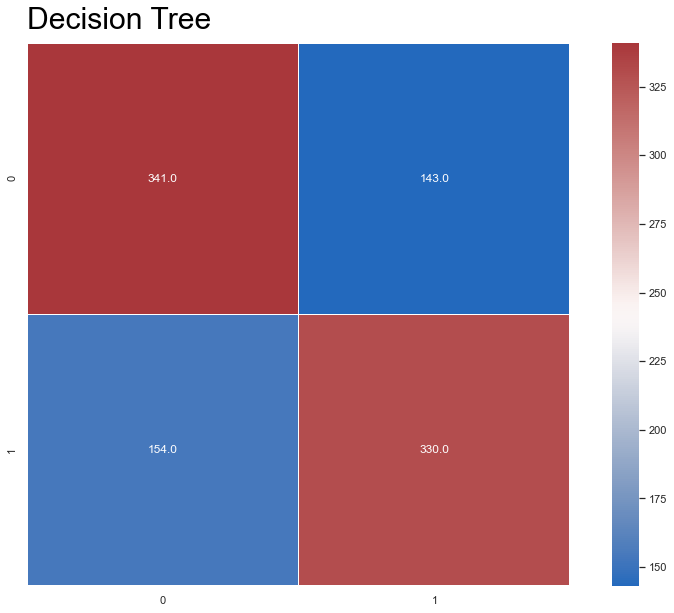

In [20]:
f, ax = plt.subplots(figsize=(15, 10))
_ = sns.heatmap(con_mat, annot=True, linewidths=1, ax=ax, cmap='vlag', fmt=".1f", square=True)
plt.text(0,-0.05, "Decision Tree", fontsize = 30, color='Black')

In [21]:
print(accuracy_score(y_test,predictions))

0.6931818181818182


In [22]:
#testing for overfitting by measuring against the test data
predictions = tree_model.predict(x_train)

print(accuracy_score(y_train,predictions))

1.0


We are definitely overfitting.

In [23]:
# Visualize data 

import pydotplus
#from sklearn import tree (already imported)
import collections

dot_data = tree.export_graphviz(tree_model,
                                feature_names=feature_cols,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree_unpruned.png')

True

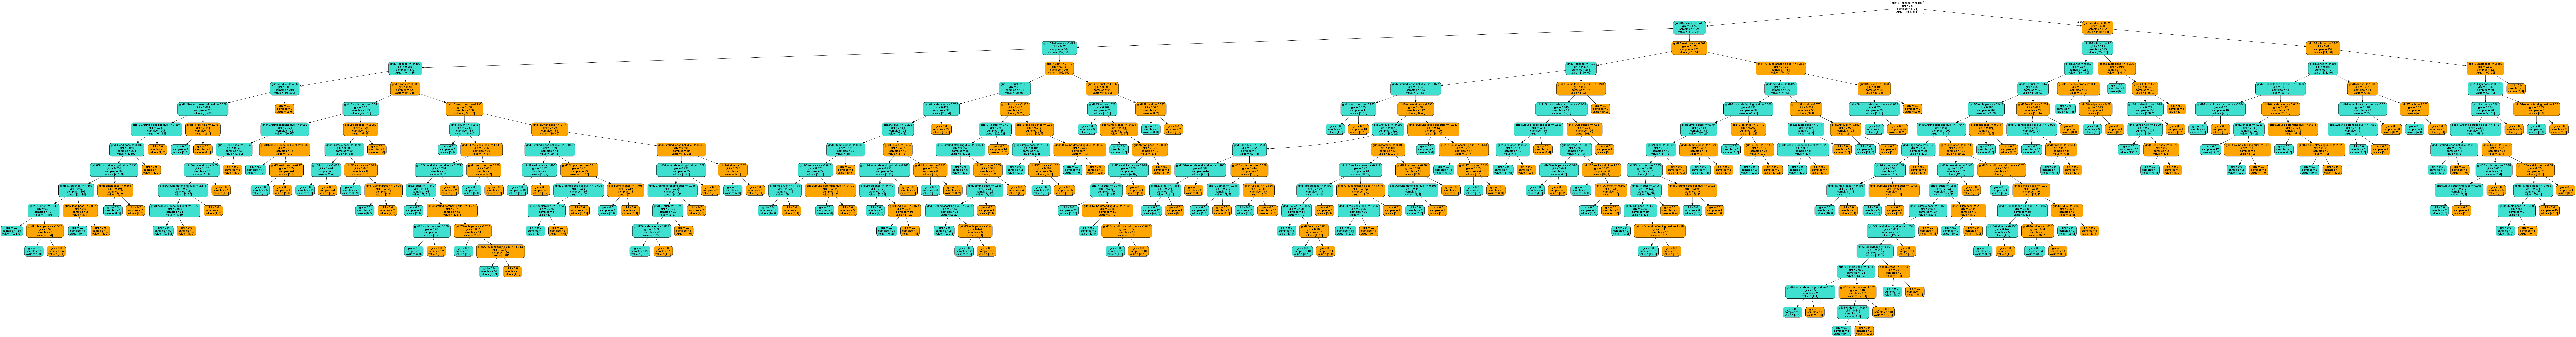

In [24]:
#display the png here
from IPython.display import Image

Image(filename='tree_unpruned.png') 

### 2.2 Decision Tree with pruning

Definitely over-fitting the data, so on to pruning. The following section was retrieved from:https://medium.com/datadriveninvestor/decision-tree-adventures-2-explanation-of-decision-tree-classifier-parameters-84776f39a28

   max_depth   accuracy
0        2.0  75.619835
1        3.0  74.276860
2        4.0  75.619835
3        5.0  75.309917
4        6.0  74.173554
5        7.0  70.247934
6        8.0  70.764463
7        9.0  71.074380
8       10.0  71.384298



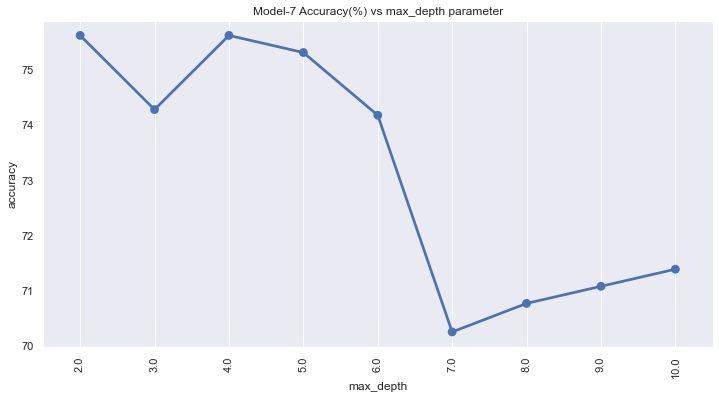

In [25]:
c_parameter_name = 'max_depth'
c_parameter_values = [2,3,4,5,6,7,8,9,10]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

    min_samples_split   accuracy
0                 5.0  70.144628
1                10.0  69.008264
2                15.0  70.454545
3                20.0  70.144628
4                25.0  70.661157
5                30.0  71.694215
6                35.0  72.830579
7                40.0  73.140496
8                50.0  73.037190
9                60.0  74.276860
10               70.0  74.173554
11               80.0  74.276860
12               90.0  74.173554



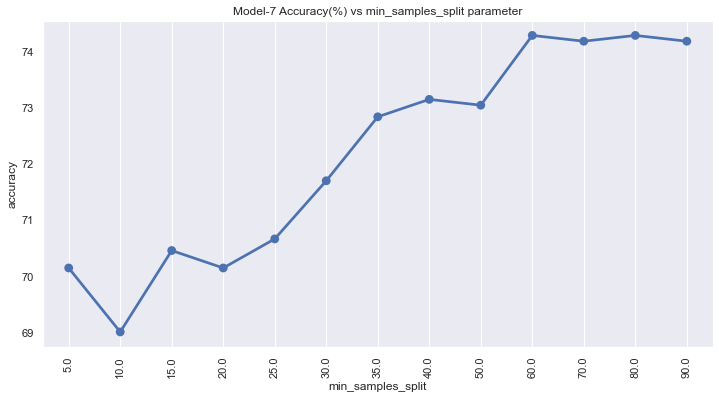

In [26]:
c_parameter_name = 'min_samples_split'
c_parameter_values = [5,10,15,20,25,30,35,40,50,60,70,80,90]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

   min_samples_leaf   accuracy
0               5.0  71.900826
1              10.0  73.037190
2              20.0  72.107438
3              30.0  74.276860
4              35.0  74.690083
5              40.0  75.619835
6              50.0  74.276860
7              60.0  75.516529
8              70.0  74.896694
9              80.0  74.380165



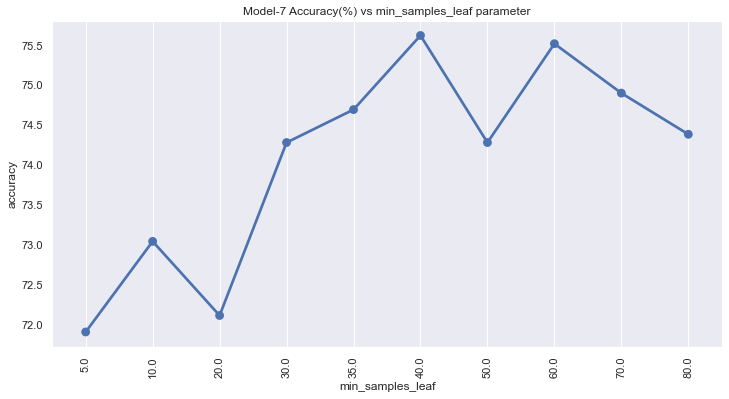

In [27]:
c_parameter_name = 'min_samples_leaf'
c_parameter_values = [5,10,20,30,35,40,50,60,70,80]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

   max_leaf_nodes   accuracy
0             2.0  68.595041
1             3.0  75.619835
2             4.0  75.619835
3             5.0  75.619835
4             6.0  75.619835
5             7.0  75.206612
6             8.0  74.276860
7             9.0  74.276860
8            10.0  74.276860



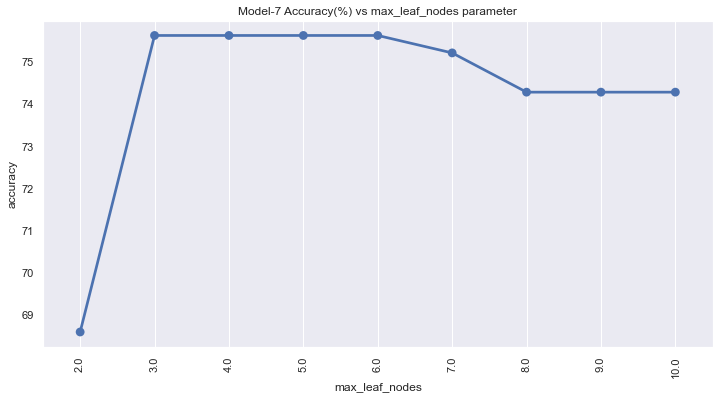

In [28]:
c_parameter_name = 'max_leaf_nodes'
c_parameter_values = [2,3,4,5,6,7,8,9,10]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

   min_impurity_decrease   accuracy
0                 0.0005  70.041322
1                 0.0010  70.041322
2                 0.0020  70.041322
3                 0.0050  69.318182
4                 0.0100  74.380165
5                 0.0200  75.619835
6                 0.0500  75.619835



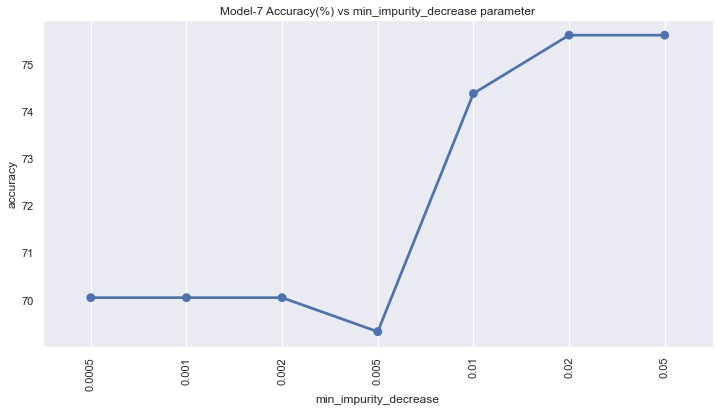

In [29]:
c_parameter_name = 'min_impurity_decrease'
c_parameter_values = [0.0005,0.001,0.002,0.005,0.01,0.02,0.05]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=input_parameter, random_state=35)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
        
    acc_score = accuracy_score(y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)
print("")
plt.figure(figsize=(12,6))
sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
title = 'Model-7 Accuracy(%) vs ' + c_parameter_name + ' parameter'
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

In [30]:
#let's try our pruned model
pruned_model = tree.DecisionTreeClassifier(criterion='entropy', 
                                           splitter='random', 
                                           max_depth=4, 
                                           min_samples_split=60, 
                                           min_samples_leaf=40, 
                                           max_leaf_nodes=3, 
                                           min_impurity_decrease=0.02, 
                                           random_state=35)

pruned_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=3,
                       min_impurity_decrease=0.02, min_samples_leaf=40,
                       min_samples_split=60, random_state=35,
                       splitter='random')

In [31]:
#gathering the predictions
prediction = pruned_model.predict(x_test)

con_mat = confusion_matrix(y_test, prediction)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, prediction) )

[[337 147]
 [247 237]]
Accuracy Score : 0.5929752066115702


Text(0, -0.05, 'Decision Tree')

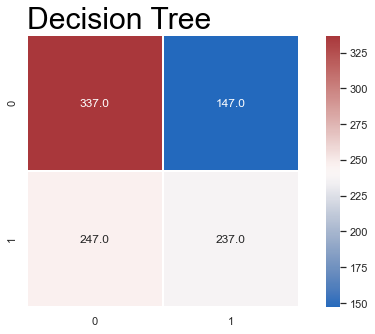

In [32]:
f, ax = plt.subplots(figsize=(10, 5))
_ = sns.heatmap(con_mat, annot=True, linewidths=1, ax=ax, cmap='vlag', fmt=".1f", square=True)
plt.text(0,-0.05, "Decision Tree", fontsize = 30, color='Black')

In [33]:
#classification matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.58      0.70      0.63       484
           1       0.62      0.49      0.55       484

    accuracy                           0.59       968
   macro avg       0.60      0.59      0.59       968
weighted avg       0.60      0.59      0.59       968



In [34]:
# Visualize data 

import pydotplus
#from sklearn import tree (already imported)
import collections

dot_data = tree.export_graphviz(pruned_model,
                                feature_names=feature_cols,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('dec_tree.png')

True

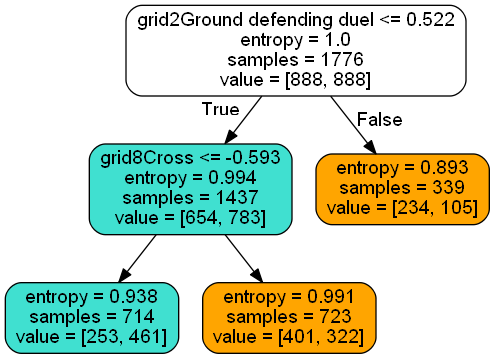

In [35]:
#display the png here
from IPython.display import Image

Image(filename='dec_tree.png') 

### 2.3 Random Forest

In [36]:
#let's try our pruned model with Random Forest
pruned_model = RandomForestClassifier(max_depth=4,
                                      min_samples_split=60,
                                      min_samples_leaf=40,
                                      max_leaf_nodes=3, 
                                      min_impurity_decrease=0.02,
                                      random_state=35)

pruned_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_leaf_nodes=3,
                       min_impurity_decrease=0.02, min_samples_leaf=40,
                       min_samples_split=60, random_state=35)

In [37]:
#gathering the predictions
prediction = pruned_model.predict(x_test)

con_mat = confusion_matrix(y_test, prediction)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, prediction) )

[[321 163]
 [ 89 395]]
Accuracy Score : 0.7396694214876033


Text(0, -0.05, 'Random Forest')

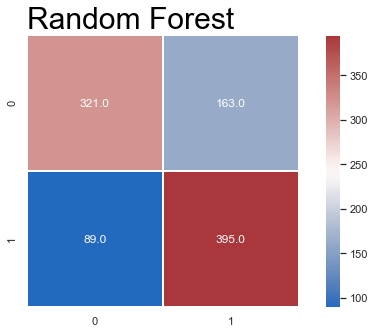

In [38]:
f, ax = plt.subplots(figsize=(10, 5))
_ = sns.heatmap(con_mat, annot=True, linewidths=1, ax=ax, cmap='vlag', fmt=".1f", square=True)
plt.text(0,-0.05, "Random Forest", fontsize = 30, color='Black')

In [39]:
#classification matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72       484
           1       0.71      0.82      0.76       484

    accuracy                           0.74       968
   macro avg       0.75      0.74      0.74       968
weighted avg       0.75      0.74      0.74       968



### 2.4 KNN

Find the optimal k - value

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# test values for k to see what looks best

scores = []
print(f'Features: {feature_cols} \nTarget: {prediction_col}')

for k in range(2, 20):
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))

Features: ['grid6Simple pass', 'grid6Touch', 'grid6Ground loose ball duel', 'grid6Ground attacking duel', 'grid6Ground defending duel', 'grid6Air duel', 'grid6Smart pass', 'grid6Shot', 'grid6Acceleration', 'grid6Head pass', 'grid6High pass', 'grid6Clearance', 'grid6Free Kick', 'grid6Free kick shot', 'grid6Free kick cross', 'grid11Simple pass', 'grid11Touch', 'grid11Ground loose ball duel', 'grid11Ground attacking duel', 'grid11Ground defending duel', 'grid11Air duel', 'grid11Smart pass', 'grid11Shot', 'grid11Acceleration', 'grid11Head pass', 'grid11Cross', 'grid11High pass', 'grid11Clearance', 'grid11Free Kick', 'grid11Free kick shot', 'grid11Free kick cross', 'grid10Simple pass', 'grid10Touch', 'grid10Ground loose ball duel', 'grid10Ground attacking duel', 'grid10Ground defending duel', 'grid10Air duel', 'grid10Smart pass', 'grid10Shot', 'grid10Acceleration', 'grid10Head pass', 'grid10Cross', 'grid10High pass', 'grid10Clearance', 'grid10Free Kick', 'grid10Free kick shot', 'grid10Free 

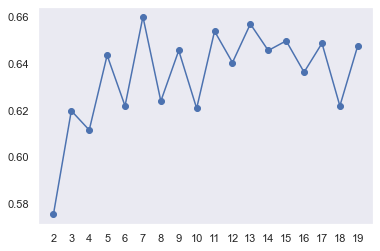

In [41]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

In [42]:
# define and fit our model
model = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
model.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [43]:
# gather the predictations that our model made for our test set
predictions = model.predict(x_test)

con_mat = confusion_matrix(y_test, predictions)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, predictions) )

[[406  78]
 [251 233]]
Accuracy Score : 0.6601239669421488


Text(0, -0.05, 'K-Nearest Neighbors')

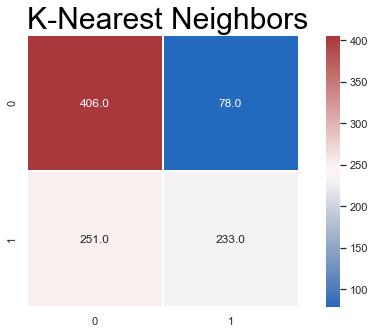

In [44]:
f, ax = plt.subplots(figsize=(10, 5))
_ = sns.heatmap(con_mat, annot=True, linewidths=1, ax=ax, cmap='vlag', fmt=".1f", square=True)
plt.text(0,-0.05, "K-Nearest Neighbors", fontsize = 30, color='Black')

In [45]:
#classification matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.84      0.71       484
           1       0.75      0.48      0.59       484

    accuracy                           0.66       968
   macro avg       0.68      0.66      0.65       968
weighted avg       0.68      0.66      0.65       968



### 2.5  Neural Network

#### Grid search to optimize parameters

The grid seach method utilized below is based off of the code from: 
https://medium.com/@panjeh/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

In [ ]:
# Create a parameter list to optimize off of

parameter_space = {
    'max_iter':[100, 500, 1000],
    'hidden_layer_sizes': [(5,), (10,), (20,)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.01, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

In [ ]:
x = games_train[feature_cols].values
y = games_train[prediction_col].values

# create the model and the grid search
model = MLPClassifier() 

clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf.fit(x, y)

In [ ]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Use our optimal parameter set in the model.

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(20,), 
                      activation='tanh', 
                      alpha=0.05, 
                      learning_rate='invscaling', 
                      solver='adam', 
                      max_iter=100)

#### Assess Training and Validation loss
Split the training data into train and validation sets.

In [ ]:
#create validation set from the training set
x_trainV, x_val, y_trainV, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=35)

In [ ]:
model.fit(x_trainV, y_trainV) 

train = model.loss_curve_

In [ ]:
model.fit(x_val, y_val) 
val = model.loss_curve_

In [ ]:
# training and validation loss curve
fig, ax = plt.subplots()
ax.set_title('Training and Validation Loss')
ax.plot(val, label='Validation')
ax.plot(train, label='Training')
ax.legend()

We seem to be moving towards stability on the loss curves.

#### Run optimal model

In [ ]:
#fit the model to the training data
model.fit(x_train, y_train) 

In [ ]:
# make predictions
predictions = model.predict(x_test)  

#### Assess results

In [ ]:
y_true, y_pred = y_test , model.predict(x_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

In [ ]:
con_mat = confusion_matrix(y_test, predictions)
print(con_mat)
print('Accuracy Score :', accuracy_score(y_test, predictions) )

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
_ = sns.heatmap(con_mat, annot=True, linewidths=1, ax=ax, cmap='vlag', fmt=".1f", square=True)
plt.text(0,-0.05, "Neural Network", fontsize = 30, color='Black')

##### 